In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#reading csv file
df=pd.read_csv("https://raw.githubusercontent.com/github-goog/colab/main/instagram_dataset.csv")
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,time
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3
...,...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31,3
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42,3
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10,3
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222,3


In [3]:
df.head(15)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes,time
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139,11
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23,2
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25,2
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49,3
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30,3
5,5,6,be.masterly,Cyber attacks are more frequent every day and ...,1231,#edtech #learning#educationtechnology #tech #l...,3 hours,18,3
6,6,7,lenovoworkstations,Check it out – we’re walking across the 🌎’s fi...,259,.#Tech #virtualreality #IoT #Machinelearning,3 hours,35,3
7,7,8,kirellb,Here's a network I made that depicts the scien...,1433,#datascientist #creativetechnology#design #art...,4 hours,86,4
8,8,9,ethicsandai,Having a great week at @ldntechweek exploring ...,13,#LTW #London #TechXLR8 #Technology#AI #Artific...,4 hours,22,4
9,9,10,diworksolucionesdeti,The Internet of Things : A Very Short Story [#...,450,[#Infographic] #Wearable #Sensors #MachineLear...,7 hours,18,7


In [4]:
df.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes', 'time'],
      dtype='object')

In [5]:
df=df.drop(['Unnamed: 0','S.No','Caption','Hashtags'],axis=1)
df.head(15)

,USERNAME,Followers,Time since posted,Likes,time
0,mikequindazzi,1600,11 hours,139,11
1,drgorillapaints,880,2 hours,23,2
2,aitrading_official,255,2 hours,25,2
3,opensourcedworkplace,340,3 hours,49,3
4,crea.vision,304,3 hours,30,3
5,be.masterly,1231,3 hours,18,3
6,lenovoworkstations,259,3 hours,35,3
7,kirellb,1433,4 hours,86,4
8,ethicsandai,13,4 hours,22,4
9,diworksolucionesdeti,450,7 hours,18,7


In [6]:
df.shape

(100, 5)

In [7]:
df.isnull().sum()

USERNAME             0
Followers            0
Time since posted    0
Likes                0
time                 0
dtype: int64

<AxesSubplot:>

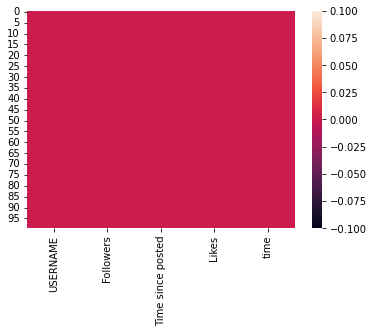

In [8]:
sns.heatmap(df.isnull())

<AxesSubplot:>

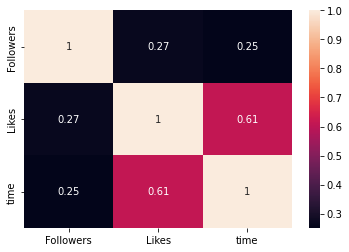

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

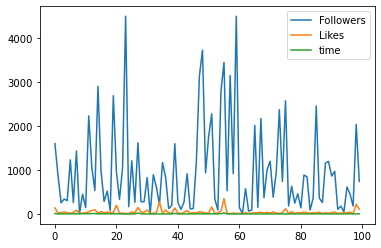

In [10]:
df.plot()

(array([44., 17., 17.,  5.,  4.,  5.,  4.,  1.,  1.,  2.]),
 array([  11. ,  459.5,  908. , 1356.5, 1805. , 2253.5, 2702. , 3150.5,
        3599. , 4047.5, 4496. ]),
 <BarContainer object of 10 artists>)

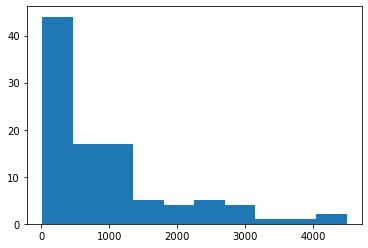

In [11]:
plt.hist(df['Followers'])

(array([70., 14.,  7.,  3.,  2.,  1.,  1.,  1.,  0.,  1.]),
 array([  8. ,  42.1,  76.2, 110.3, 144.4, 178.5, 212.6, 246.7, 280.8,
        314.9, 349. ]),
 <BarContainer object of 10 artists>)

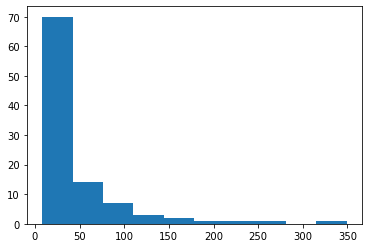

In [12]:
plt.hist(df['Likes'])

(array([89.,  1.,  4.,  1.,  2.,  1.,  0.,  0.,  1.,  1.]),
 array([ 2. ,  4.2,  6.4,  8.6, 10.8, 13. , 15.2, 17.4, 19.6, 21.8, 24. ]),
 <BarContainer object of 10 artists>)

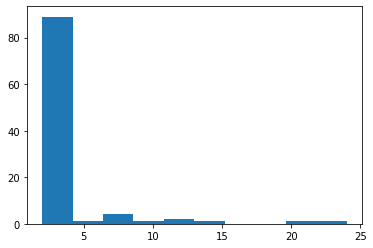

In [13]:
plt.hist(df["time"])

In [14]:
x = df.drop('Likes',axis=1)
y = df[['Likes']]
print("x dataset ---->")
print()
print(x)
print()
print()
print("y dataset ---->")
print()
print(y)
print()

x dataset ---->

                USERNAME  Followers Time since posted  time
0          mikequindazzi       1600          11 hours    11
1        drgorillapaints        880           2 hours     2
2     aitrading_official        255           2 hours     2
3   opensourcedworkplace        340           3 hours     3
4            crea.vision        304           3 hours     3
..                   ...        ...               ...   ...
95        michaelgarza__        614           3 hours     3
96           dvlp_search        450           3 hours     3
97            ecom.space        182           3 hours     3
98        lb3enterprises       2039           3 hours     3
99          palmariusdev        741           3 hours     3

[100 rows x 4 columns]


y dataset ---->

    Likes
0     139
1      23
2      25
3      49
4      30
..    ...
95     31
96     42
97     10
98    222
99    109

[100 rows x 1 columns]





AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


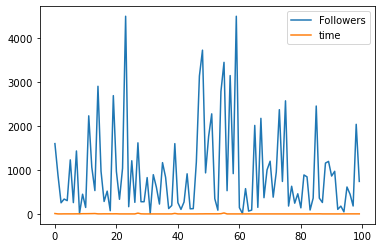

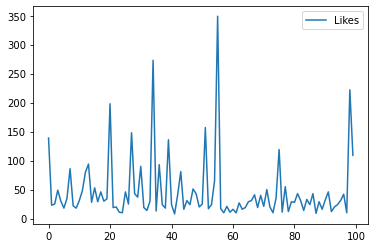

In [15]:
#plotting x and y dataset
print()
plot1=x.plot()
print()
plot2=y.plot()
print(plot1)
print(plot2)

In [16]:
#splitting dataset in 80:20 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [17]:

#training the model
reg=LinearRegression()
reg.fit(x_train[['Followers','time']],y_train)

LinearRegression()

In [18]:
#making prediction on test dataset
y_predicted=reg.predict(x_test[['Followers','time']])
print(y_predicted)

[[ 29.32141621]
 [ 40.01992577]
 [ 31.15514132]
 [ 32.23977022]
 [ 29.47357638]
 [ 50.47653967]
 [ 32.03298845]
 [ 32.07200388]
 [ 32.68844764]
 [ 36.63290742]
 [ 29.18876375]
 [153.05289191]
 [ 30.8430179 ]
 [ 49.80547431]
 [ 57.33155037]
 [ 32.26317948]
 [ 28.82201873]
 [ 29.23558227]
 [ 29.73497974]
 [ 78.5378731 ]]


In [19]:
#visualizing Predicted and actual values
temp1=[]
temp2=[]
temp3=[]
for i in range(len(y_test.values)):
    temp1.append(int(y_test.values[i]))
for i in range(len(y_predicted)):
    temp2.append(int(y_predicted[i]))  
for i in range(len(y_predicted)):
    temp3.append(i)   

Actual Values:
[28, 33, 30, 43, 20, 46, 93, 31, 40, 29, 12, 136, 17, 17, 157, 14, 19, 16, 12, 31]
Predicted Values
[29, 40, 31, 32, 29, 50, 32, 32, 32, 36, 29, 153, 30, 49, 57, 32, 28, 29, 29, 78]





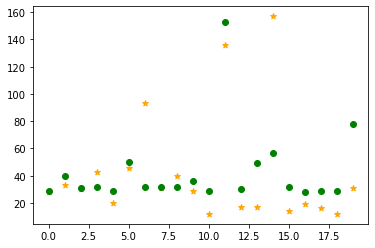

In [20]:
print("Actual Values:")
print(temp1)
print("Predicted Values")
print(temp2)
print("\n"*2)
plt.scatter(temp3,temp1,marker="*",color='orange')
plt.scatter(temp3,temp2,color='green')

In [21]:
#printing prediction MSE value
pred=mean_squared_error(y_test,y_predicted)
print("Mean Squared error: %f"%pred)

Mean Squared error: 953.761719


In [22]:
#Making Prediction on Custom Values
custom_pred=reg.predict([[1000,3]])
print("Prediction for custom values : %f"%custom_pred[0][0])

Prediction for custom values : 42.513012


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
